In [89]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from numpy import linalg as la
import time

The file DatasaurusDozen.tsv has 13 datasets with several x and y values for each set. You can read them into a pandas dataframe with pd.read_csv('DatasaurusDozen.tsv',sep='t', header=0)

In [4]:
df = pd.read_csv('DatasaurusDozen.tsv',sep='\t',header=0)
df.describe()

,x,y
count,1846.000000,1846.000000
mean,54.265695,47.835099
std,16.713001,26.847766
min,15.560750,0.015119
25%,41.073403,22.561073
50%,52.591269,47.594450
75%,67.277845,71.810778
max,98.288123,99.694680


In [8]:
print("The mean of x is {}.\n The mean of y is {}".format(df.x.mean(),df.y.mean()))
print("The sample variance for x is {}.\n The sample variance for y is {}".format(df.x.var(),df.y.var()))

The mean of x is 54.265695295881.
 The mean of y is 47.835099204122685
The sample variance for x is 279.32441729208983.
 The sample variance for y is 720.802557651104


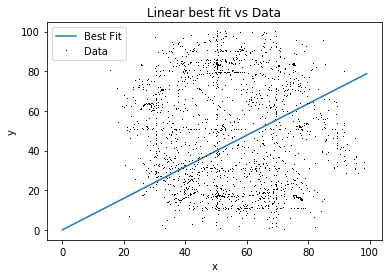

In [34]:
X,Y = df.x.as_matrix(),df.y.as_matrix()
B = X.T@Y/(X.T@X)
plt.plot([B*x for x in range(100)],label='Best Fit')
plt.plot(df.x,df.y,'k,',label='Data')
plt.legend(loc=0)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear best fit vs Data")
plt.show()

My Conclusion is that our data is not linear. We should look for a better model

In [163]:
def SVDSolver(X,Y):
    """Least squares solver using the SVD
    Inputs:
        X (nxd-array): sample from independant variables
        Y (nd-array): dependent variable
    Returns:
        B (nd-array): estimated coefficients of the linear model
        """
    U,S,V = la.svd(X,full_matrices=False)
    Sinv = (1/S)*np.eye(len(S))
    S = S*np.eye(len(S))
    x = U@S@V.T
    left = la.inv(x.T@x)
    return left@(x.T@Y)

def LeastSquaresSolver(X,Y):
    """Least squares solver using np.linalg.solve
    Inputs:
        X (nxd-array): sample from independant variables
        Y (nd-array): dependent variable
    Returns:
        B (nd-array): estimated coefficients of the linear model
        """
    return la.solve(X.T@X,X.T@Y)

def LeastSquaresSolverQR(X,Y):
    """Least squares solver using QR decomp
    Inputs:
        X (nxd-array): sample from independant variables
        Y (nd-array): dependent variable
    Returns:
        B (nd-array): estimated coefficients of the linear model
        """
    Q,R = sla.qr(X)
    return sla.solve_triangular(R[:3],Q[:3]@Y)

In [114]:
n,d=10**3,3
X = np.random.random((n,d))
b=[1,2,3]
e=np.random.random(n)
Y = np.dot(X,b) + e

In [115]:
bhat = SVDSolver(X,Y)
print("Known Beta value:{}\nApproximatedValue{}".format(b,bhat))

Known Beta value:[1, 2, 3]
ApproximatedValue[ 2.85697843 -2.74200057  1.52466812]


In [126]:
start = time.time()
bQR=LeastSquaresSolverQR(X,Y)
end = time.time()
print("The QR solver finished in {} seconds\n\t it was off by {}".format(end-start,abs(bQR-b)))

The QR solver finished in 0.023964643478393555 seconds
	 it was off by [1.09022407 0.52017875 0.32350896]


In [158]:
start1 = time.time()
bSolve=LeastSquaresSolver(X,Y)
end = time.time()
print("The naive solver finished in {} seconds\n\t it was off by {}".format(end-start1,abs(bSolve-b)))

The naive solver finished in 0.00399327278137207 seconds
	 it was off by [0.31157352 0.27329421 0.33427865]


In [128]:
start2 = time.time()
bhat = SVDSolver(X,Y)
end = time.time()
print("The SVD Solver finished in {} seconds\n\t it was off by {}".format(end-start2,abs(bhat-b)))

The SVD Solver finished in 0.003969669342041016 seconds
	 it was off by [1.85697843 4.74200057 1.47533188]


In [159]:
n,d,r=10**3,6,3
Z = np.random.random((n,r))
X = np.hstack([Z,Z])
b=[1,2,3,1,2,3]
e=np.random.random(n)
Y = np.dot(X,b) + e

In [164]:
bhat = SVDSolver(X,Y)
print("Known Beta value:{}\nApproximatedValue{}".format(b,bhat))
print('The residuals are {}'.format(abs(bhat-b)))

Known Beta value:[1, 2, 3, 1, 2, 3]
ApproximatedValue[192. -77. 112. -96. -20. -96.]
The residuals are [191.  79. 109.  97.  22.  99.]
